In [ ]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 55.7 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo imagens
with rio.open('/content/drive/MyDrive/ALOS/ALOS-P1_1__A-ORBIT__ALPSRP066516870.tif') as src1:
  sHHi = src1.read(1)
  sHHq = src1.read(2)
  sHVi = src1.read(3)
  sHVq = src1.read(4)
  sVHi = src1.read(5)
  sVHq = src1.read(6)
  sVVi = src1.read(7)
  sVVq = src1.read(8)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
# Componentes
k1r = (sHHq + sVVq)
k1i = (sHHi + sVVi)
k2r = (sHHq - sVVq)
k2i = (sHHi - sVVi)
k3r = (sHVq + sVHq)
k3i = (sHVi + sVHi)

In [ ]:
#Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,255  
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

In [ ]:
# Calculando elementos da T3
T11 = k1r * k1r + k1i * k1i
T11_i = 0.0

T12 = k1r * k2r + k1i * k2i
T12_i = k1i * k2r - k1r * k2i

T13 = k1r * k3r + k1i * k3i
T13_i = k1i * k3r - k1r * k3i

T22 = k2r * k2r + k2i * k2i
T22_i = 0.0

T23 = k2r * k3r + k2i * k3i
T23_i = k2i * k3r - k2r * k3i

T33 = k3r * k3r + k3i * k3i
T33_i = 0.0


'Tr[1][0] = Tr[0][1];\nTi[1][0] = -Ti[0][1];\nTr[2][0] = Tr[0][2];\nTi[2][0] = -Ti[0][2];\nTr[2][1] = Tr[1][2];\nTi[2][1] = -Ti[1][2]'

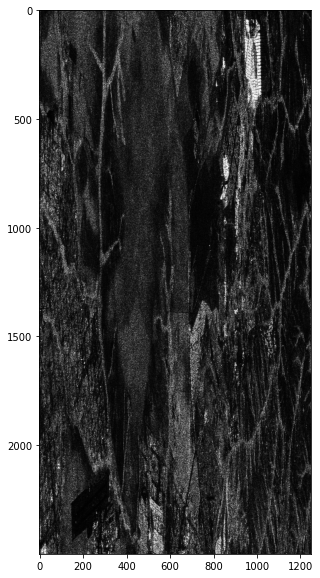

In [ ]:
# Visualizando resultado
plt.figure(figsize=(15,10))
plt.imshow(expansao(T22[7500:10000, :]), cmap="gray")